In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import erf
import linalg
%matplotlib inline

In [2]:
# вероятности переходов между верщинами (состояниями)
# матрица перехода за один шаг

p = np.array([
    [0, 0.7, 0, 0, 0.3, 0, 0, 0],
    [0, 0.5, 0.2, 0.3, 0, 0, 0, 0],
    [0, 0.4, 0, 0, 0.3, 0, 0, 0.3],
    [0.4, 0, 0, 0.4, 0, 0.2, 0, 0],
    [0, 0, 0.1, 0, 0.4, 0.5, 0, 0],
    [0.4, 0, 0, 0, 0, 0, 0.6, 0],
    [0, 0, 0, 0.2, 0.3, 0, 0, 0.5],
    [0, 0, 0, 0, 0.2, 0.4, 0, 0.4]])


nodes = 8 # number of nodes in our chain
eps = 0.000001; # accuracy

# first random vector of the first state
vector1 = np.array([0, 0.1, 0.2, 0, 0.3, 0.1, 0, 0.3])

# second random vector of the first state
vector2 = np.array([0.1, 0.1, 0.1, 0, 0.2, 0.5, 0, 0])

In [3]:
# multiplying elements of array to vector
def multiplying(vector, array):
    result = np.zeros(nodes)
    for i in range(nodes):
        for j in range(nodes):
            result[i] += vector[j] * array[j][i]
    return result

In [4]:
def squareDiff(prev, curr):
    sum = np.sum(np.square(prev - curr))
    return sum

In [5]:
def analysis(vector):
    print("START")
    difference = []
    diff = 2 * eps
    while(diff > eps):
        next = multiplying(vector, p)
        diff = squareDiff(vector, next)
        print(diff)
        vector = next
        difference.append(diff)
    print("Solution is: ", vector)
    print("FINISHED")
    return vector, difference

In [6]:
# solution for the first vector
test1, diff1  = analysis(vector1)

START
0.07640000000000001
0.031304000000000005
0.008730080000000005
0.0023455496000000004
0.0010674805760000005
0.0004086032741600003
0.0001511421606799999
4.564764247853597e-05
2.2492387771882733e-05
1.0476306388411062e-05
3.22413868135176e-06
1.692706660706163e-06
8.4129780284978e-07
Solution is:  [0.11107156 0.19983422 0.05615837 0.12924597 0.16292521 0.14855967
 0.08930459 0.10290039]
FINISHED


In [7]:
# solution for the second vector
test2, diff2 = analysis(vector2)

START
0.2726
0.121352
0.025920079999999998
0.011296939999999998
0.0036649515439999983
0.0007603105954399995
0.0003580173112375998
9.072978571963996e-05
2.850646697646773e-05
9.883754457204147e-06
2.697042211490907e-06
1.1897564526239779e-06
2.7072898727564964e-07
Solution is:  [0.11118125 0.20041576 0.05636692 0.12977616 0.16248234 0.14840327
 0.08897063 0.10240368]
FINISHED


In [8]:
# матрица вероятностей на 20 шагу(можно поменять степень на любое другое число)
power = np.linalg.matrix_power(p, 20) 
print(power)

[[0.11125451 0.20095981 0.05642473 0.13011542 0.16226753 0.14800917
  0.08879234 0.10217649]
 [0.11126048 0.20099979 0.05643408 0.13014612 0.16224473 0.14798962
  0.08877377 0.1021514 ]
 [0.11123837 0.20083419 0.05639708 0.13002126 0.16233479 0.14807294
  0.08885104 0.10225034]
 [0.11125459 0.20096378 0.05642659 0.13011943 0.1622645  0.14800918
  0.08878892 0.10217302]
 [0.11122499 0.20076032 0.05638286 0.12996765 0.1623749  0.14811572
  0.08887954 0.10229402]
 [0.11123903 0.2008065  0.05639341 0.13000376 0.16234308 0.14809001
  0.08886502 0.10225919]
 [0.11122617 0.20074002 0.0563762  0.12995049 0.16238549 0.1481205
  0.08889512 0.10230602]
 [0.11121996 0.20071591 0.05637276 0.12993408 0.16239855 0.1481374
  0.0889013  0.10232004]]


<function matplotlib.pyplot.show(*args, **kw)>

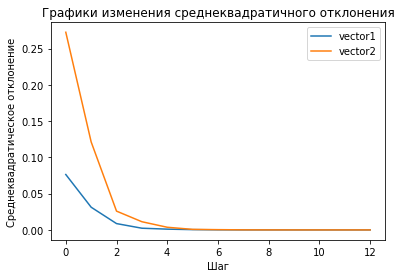

In [9]:
y1, y2 = np.arange(len(diff1)), np.arange(len(diff2))
plt.title("Графики изменения среднеквадратичного отклонения")
plt.ylabel("Среднеквадратическое отклонение")
plt.xlabel("Шаг")
line1, line2 = plt.plot(y1, diff1, y2, diff2)
plt.legend((line1, line2), ('vector1', 'vector2'))
plt.show

In [10]:
# транспонируем матрицу вероятностей
array = p.T
eye = np.eye(nodes) # единичная матрица
array -= eye
"""
добавляем условие нормировки
это приводит к потере информации, однако если так не сделать, то одно из решений может оказаться нулём
"""
one = np.ones(nodes)
array[nodes - 1] = one 
print("array: ", array)
det = np.linalg.det(array)
print("Определитель полученной матрицы: ", det)

array:  [[-1.   0.   0.   0.4  0.   0.4  0.   0. ]
 [ 0.7 -0.5  0.4  0.   0.   0.   0.   0. ]
 [ 0.   0.2 -1.   0.   0.1  0.   0.   0. ]
 [ 0.   0.3  0.  -0.6  0.   0.   0.2  0. ]
 [ 0.3  0.   0.3  0.  -0.6  0.   0.3  0.2]
 [ 0.   0.   0.   0.2  0.5 -1.   0.   0.4]
 [ 0.   0.   0.   0.   0.   0.6 -1.   0. ]
 [ 1.   1.   1.   1.   1.   1.   1.   1. ]]
Определитель полученной матрицы:  -0.367632


In [11]:
# используем метод Крамера для решения системы линейных уравнений
if det != 0:
    print("ANALYTICS")
    tmp = np.zeros((nodes, nodes))
    result = []
    for k in range(nodes): # we change the column k
        for i in range(nodes):
            for j in range(nodes):
                tmp[i][j] = array[i][j]
                if j == k:
                    if i < (nodes - 1):
                        tmp[i][j] = 0
                    else:
                        tmp[i][j] = 1
        result.append( np.linalg.det(tmp)/det)
    print("Solution is: ", result)
    print("Squared diff from test 1: ", squareDiff(result, test1))
    print("Squared diff from test 2: ", squareDiff(result, test2))
    
else:
    print("Sorry, there's no solution")

ANALYTICS
Solution is:  [0.11124167645906774, 0.20086173129651383, 0.056404230317273776, 0.13004308656482572, 0.16231884057971013, 0.14806110458284372, 0.08883666274970621, 0.10223266745005871]
Squared diff from test 1:  3.0616295884307127e-06
Squared diff from test 2:  4.6618761385213816e-07
